In [1]:
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import tools as tl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
dataset=p.load(open("pimaDiabetes.p","rb"))

#Data Extraction
target = dataset['target']
data = dataset['data']
feature_names = dataset["feature_names"]

#Data description
print(dataset["DESCR"])

This dataset is originally from the National
Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict
whether or not a patient has diabetes, based on certain
diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these
instances from a larger database. In particular, all patients
here are females at least 21 years old of Pima Indian heritage.
The dataset contains information of 768 women from a population
near Phoenix, Arizona, USA. The outcome tested was Diabetes,
268 tested positive and 500 tested negative.

For more inforamtion:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S.
(1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).
IEEE Computer Society Press.


In [ ]:
a = np.corrcoef([data[:,0],data[:,1],data[:,2],data[:,3],data[:,4],data[:,5],data[:,6],data[:,7]])
print("  | 0\t| 1\t| 2\t| 3\t| 4\t| 5\t| 6\t| 7\t|")

for l in range(len(a)):
    string=f"|{l}|"
    for c in range(len(a[l])):
       string += str(np.round(np.abs(a[c][l]),2))+"\t| "
    print(string) 

  | 0	| 1	| 2	| 3	| 4	| 5	| 6	| 7	|
|0|1.0	| 0.13	| 0.14	| 0.08	| 0.07	| 0.02	| 0.03	| 0.54	| 
|1|0.13	| 1.0	| 0.15	| 0.06	| 0.33	| 0.22	| 0.14	| 0.26	| 
|2|0.14	| 0.15	| 1.0	| 0.21	| 0.09	| 0.28	| 0.04	| 0.24	| 
|3|0.08	| 0.06	| 0.21	| 1.0	| 0.44	| 0.39	| 0.18	| 0.11	| 
|4|0.07	| 0.33	| 0.09	| 0.44	| 1.0	| 0.2	| 0.19	| 0.04	| 
|5|0.02	| 0.22	| 0.28	| 0.39	| 0.2	| 1.0	| 0.14	| 0.04	| 
|6|0.03	| 0.14	| 0.04	| 0.18	| 0.19	| 0.14	| 1.0	| 0.03	| 
|7|0.54	| 0.26	| 0.24	| 0.11	| 0.04	| 0.04	| 0.03	| 1.0	| 


| Qualidade | Gama de Valores|
| :-: | :-: |
| Número de gravidezes | [0, 17] | 
| Concentração de glicose plasmática em 2 horas num teste oral de tolerância à glicose | [0, 199] |
| Pressão arterial diastólica (mm Hg) | [0, 122] |
| Espessura da dobra cutânea dos tríceps (mm) | [0, 99] |
| Nível sérico de insulina em 2 horas (µh/ml) | [0, 846] |
| Índice de massa corporal (peso em kg/altura em m) | [0, 67.1] |
| Diabetes Pedigree Function | [0.078, 2.42] |
| Idade (anos) | [21, 81] |

## Divisão do data set
| treino | teste | validação |
| :-: | :-: | :-: | 
| 80% | 10% | 10% |

<!-- ## Divisão do data set
| treino | teste | validação |
| :-: | :-: | :-: | 
| 80% | 10% | 10% | -->

In [101]:
X2, treino_data, y2, treino_target = train_test_split(data, target, test_size=80/100, random_state=42, stratify=target)
valid_data, teste_data, valid_target, teste_target = train_test_split(X2,y2, test_size=1/2, random_state=42, stratify=y2)

print("treino_data", treino_data.shape, "\ttreino_target",treino_target.shape)
print("valid_data", valid_data.shape, "\tvalid_target",valid_target.shape)
print("teste_data", teste_data.shape, "\ttest_target",teste_target.shape)

# [:,0] - n gravidez
# [:,1] - glicose
# [:,2] - pressao arterial
# [:,3] - dobra do tricep
# [:,4] - nivel de insulina
# [:,5] - IMC
# [:,6] - DPF
# [:,7] - idade

treino_data (615, 8) 	treino_target (615,)
valid_data (76, 8) 	valid_target (76,)
teste_data (77, 8) 	test_target (77,)


---
## Logistic Regression sem pré-processamento

In [41]:
# Grelha de parâmetros com os vários parâmetros que vão ser utilizados para encontrar a melhor combinação de parâmetros
lr_param_grid = {
    'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
    'max_iter': [300, 400, 500, 600, 700, 800, 900, 1000]
}

# Inicializar o classificador
lr = LogisticRegression(random_state=42)

lr_params = tl.get_best_params(lr_param_grid, lr, treino_data, treino_target)
print(lr_params)

{'C': 1.5, 'max_iter': 300}


In [102]:
lr_params = {'C': 1.5, 'max_iter': 300} #resultado do get_best_params
lr = LogisticRegression(C=lr_params['C'], max_iter=lr_params['max_iter'], random_state=42)
lr.fit(treino_data, treino_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'



True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 20 (74.0%)            
False Positives 7 (26.0%)            

Recall Rate: 96.0%            
Specificity Rate: 74.1%            

Positive Precision : 87.3%            
Negative Precision : 90.9%            

F-Score : 91.4435%            
G-Score : 91.5467%
ROC Score: 90.59%


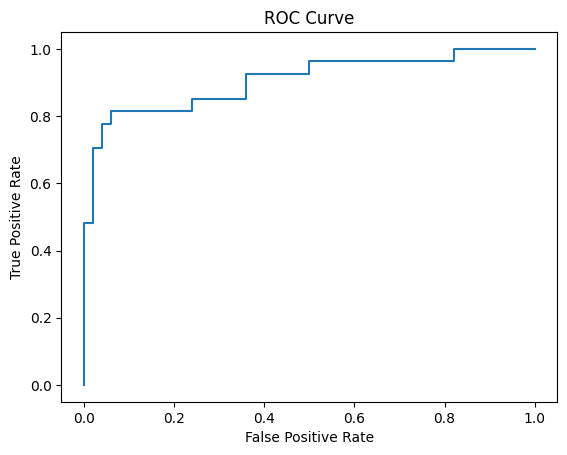

In [103]:
lr_pred = lr.predict(teste_data)
tl.predition_stats(teste_target,lr_pred)

# Curva ROC
t2logR = lr.decision_function(teste_data)
tl.ROC_curve(teste_target,t2logR)

---
## Random Forest Classifier sem pré-processamento

In [24]:
# Grid de parâmetros para procurar a melhor combinação
rf_param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200],# Número de árvores
    'max_depth': [None, 6, 7, 8, 9, 10, 11],    # Profundidade máxima das árvores
    'min_samples_split': [2, 5],               # Amostras mínimas para dividir um nó
    'min_samples_leaf': [1, 2]                 # Amostras mínimas nas folhas
}

rf = RandomForestClassifier(random_state=42)

# Encontrar os melhores parâmetros
rf_params = tl.get_best_params(rf_param_grid, rf, treino_data, treino_target)
print(rf_params)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


In [104]:
rf_params = {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}  #resultado do get_best_params

rf = RandomForestClassifier(**rf_params, random_state=42)
rf.fit(treino_data, treino_target)

,n_estimators,30
,criterion,'gini'
,max_depth,6
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



True Positives 45 (90.0%)            
False Negatives 5 (10.0%)            

True Negatives 19 (70.0%)            
False Positives 8 (30.0%)            

Recall Rate: 90.0%            
Specificity Rate: 70.4%            

Positive Precision : 84.9%            
Negative Precision : 79.2%            

F-Score : 87.3756%            
G-Score : 87.4128%
ROC Score: 89.11%


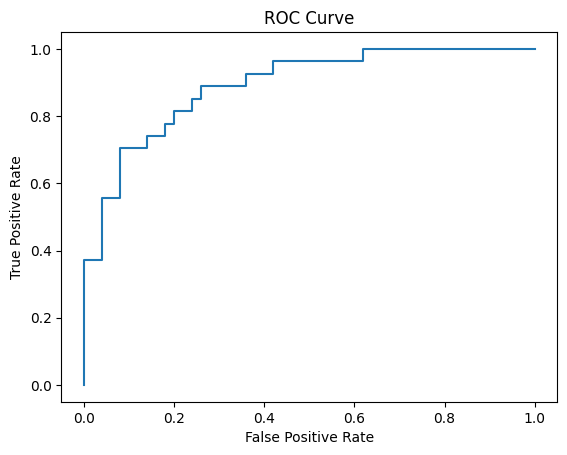

In [105]:
rf_pred = rf.predict(teste_data) 
tl.predition_stats(teste_target, rf_pred)

pp_rf = rf.predict_proba(teste_data)[:, 1]
tl.ROC_curve(teste_target,pp_rf)

---
## C-Support Vector Classification sem pré processamento

In [38]:
# Definir a grade de parâmetros
svc_param_grid = {
    'C': [1, 2, 3, 4, 5, 6, 7],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc = SVC(random_state=42)

svc_params = tl.get_best_params(svc_param_grid, svc, treino_data, treino_target)
print(svc_params)

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [106]:
svc_params = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} #resultado do get_best_params

svc = SVC(**svc_params, random_state=42)
svc.fit(treino_data, treino_target)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 16 (59.0%)            
False Positives 11 (41.0%)            

Recall Rate: 96.0%            
Specificity Rate: 59.3%            

Positive Precision : 81.4%            
Negative Precision : 88.9%            

F-Score : 88.0992%            
G-Score : 88.3991%
ROC Score: 89.11%


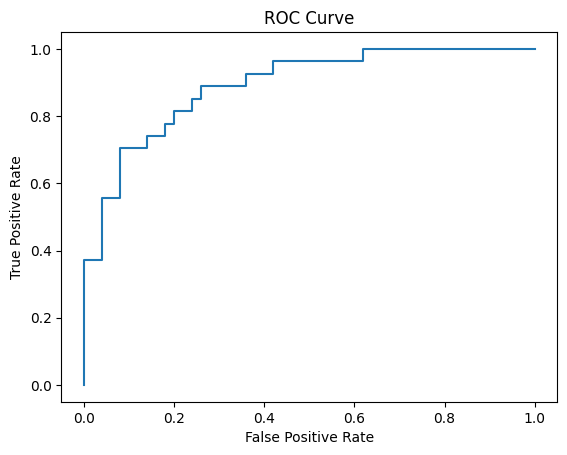

In [107]:
svc_pred = svc.predict(teste_data)
tl.predition_stats(teste_target, svc_pred)

pp_svc = svc.decision_function(teste_data)
tl.ROC_curve(teste_target,pp_rf) 

---
## Normalização de dados

In [108]:
#Normalização do conjunto de treino
norm_treino_data = tl.normalize_data(treino_data)

#Normalização do conjunto de teste
norm_teste_data = tl.normalize_data(teste_data)

#Normalização do conjunto de validação
norm_valid_data = tl.normalize_data(valid_data)

---
## Logistic Regression com pré-processamento

In [ ]:
# Grelha de parâmetros com os vários parâmetros que vão ser utilizados para encontrar a melhor combinação de parâmetros
lr_param_grid = {
    'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
    'max_iter': [300, 400, 500, 600, 700, 800, 900, 1000]
}

# Inicializar o classificador
norm_lr = LogisticRegression(random_state=42)

lr_params = tl.get_best_params(lr_param_grid, norm_lr, norm_treino_data, treino_target)
print(lr_params)

{'C': 1.5, 'max_iter': 300}


In [109]:
lr_params = {'C': 1.5, 'max_iter': 300} #resultado do get_best_params
norm_lr = LogisticRegression(C=lr_params['C'], max_iter=lr_params['max_iter'], random_state=42)
norm_lr.fit(norm_treino_data, treino_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'



True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 21 (78.0%)            
False Positives 6 (22.0%)            

Recall Rate: 96.0%            
Specificity Rate: 77.8%            

Positive Precision : 88.9%            
Negative Precision : 91.3%            

F-Score : 92.3137%            
G-Score : 92.3818%
ROC Score: 91.11%


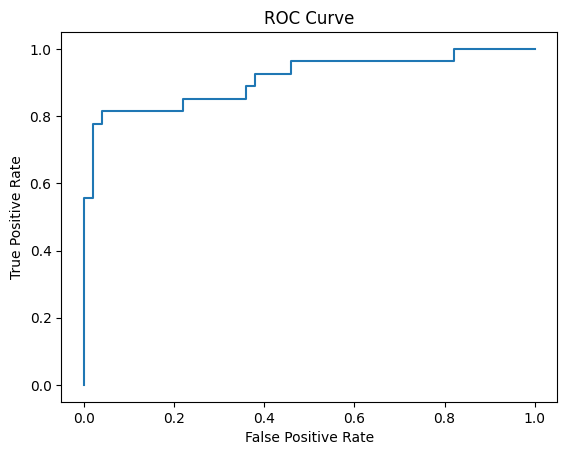

In [110]:
lr_pred = norm_lr.predict(norm_teste_data)

tl.predition_stats(teste_target,lr_pred)

# Curva ROC
t2logR = norm_lr.decision_function(norm_teste_data)
tl.ROC_curve(teste_target,t2logR)

---
## Random Forest Classifier com pré-processamento

In [ ]:
# Grid de parâmetros para procurar a melhor combinação
rf_param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200],# Número de árvores
    'max_depth': [None, 4, 5, 6, 7, 8],        # Profundidade máxima das árvores
    'min_samples_split': [2, 5],               # Amostras mínimas para dividir um nó
    'min_samples_leaf': [1, 2]                 # Amostras mínimas nas folhas
}

norm_rf = RandomForestClassifier(random_state=42)

# Encontrar os melhores parâmetros
rf_params = tl.get_best_params(rf_param_grid, norm_rf, norm_treino_data, treino_target)
print(rf_params)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [111]:
rf_params = {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  #resultado do get_best_params

norm_rf = RandomForestClassifier(**rf_params, random_state=42)
norm_rf.fit(norm_treino_data, treino_target)

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



True Positives 45 (90.0%)            
False Negatives 5 (10.0%)            

True Negatives 18 (67.0%)            
False Positives 9 (33.0%)            

Recall Rate: 90.0%            
Specificity Rate: 66.7%            

Positive Precision : 83.3%            
Negative Precision : 78.3%            

F-Score : 86.5205%            
G-Score : 86.5852%
ROC Score: 90.59%


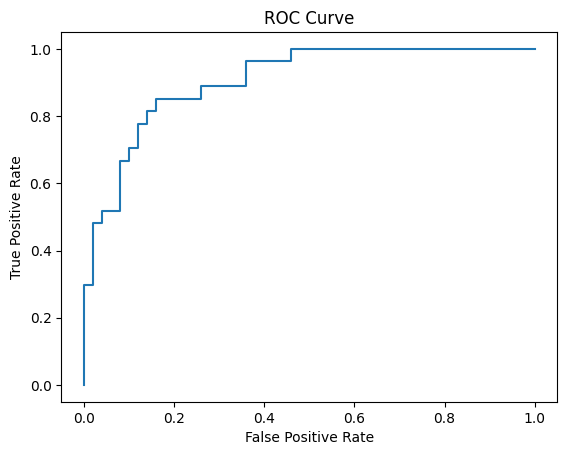

In [112]:
rf_pred = norm_rf.predict(norm_teste_data) 
tl.predition_stats(teste_target, rf_pred)

pp_rf = norm_rf.predict_proba(norm_teste_data)[:, 1]
tl.ROC_curve(teste_target,pp_rf)

---
## C-Support Vector Classification sem pré processamento

In [ ]:
# Definir a grade de parâmetros
svc_param_grid = {
    'C': [1, 2, 3, 4, 5, 6, 7],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
norm_svc = SVC(random_state=42)

svc_params = tl.get_best_params(svc_param_grid, norm_svc, norm_treino_data, treino_target)
print(svc_params)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [113]:
svc_params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} #resultado do get_best_params

norm_svc = SVC(**svc_params, random_state=42)
norm_svc.fit(norm_treino_data, treino_target)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 22 (81.0%)            
False Positives 5 (19.0%)            

Recall Rate: 96.0%            
Specificity Rate: 81.5%            

Positive Precision : 90.6%            
Negative Precision : 91.7%            

F-Score : 93.2219%            
G-Score : 93.2609%
ROC Score: 90.59%


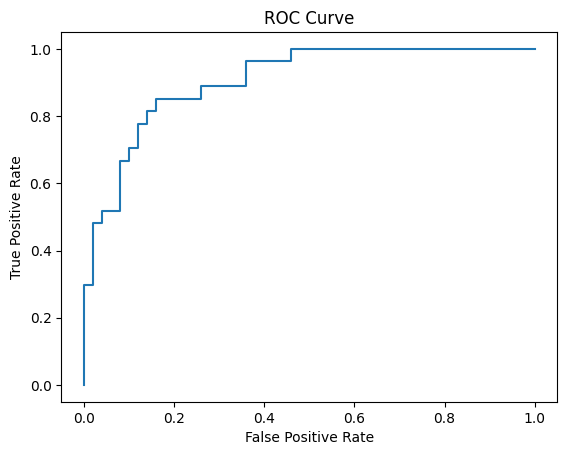

In [115]:
svc_pred = norm_svc.predict(norm_teste_data)
tl.predition_stats(teste_target, svc_pred)

pp_svc = norm_svc.decision_function(norm_teste_data)
tl.ROC_curve(teste_target,pp_rf) 

# Dados da Validação

---
## Matrizes de confusão
| | Regressão Logística | Random Forest Classifier | C-Support Vector Classifier |
|:-:|:-:|:-:|:-:|
| Sem Pré-Processamento|[46 4]|[45 5]|[45 5]|
| |[15 11]|[16 10]|[18 8]
|||||
| Com Pré-Processamento |[43 7]|[44 6]|[42 8]|
| |[14 12]|[15 11]|[14 12]|

---
## Precisão

| | Regressão Logística | Random Forest Classifier | C-Support Vector Classifier |
|:-:|:-:|:-:|:-:|
|Positivos (%)|||
| Sem Pré-Processamento|75.4|90.0|90.0|
| Com Pré-Processamento|75.4|* 80.0|75.0|
|Negativos (%)|||
| Sem Pré-Processamento|73.3|38.5|30.8|
| Com Pré-Processamento|63.2|* 71.4|60.0|

---
## F Score
| | Regressão Logística | Random Forest Classifier | C-Support Vector Classifier |
|:-:|:-:|:-:|:-:|
| Sem Pré-Processamento|82.87%|81.09%|79.62%|
| Com Pré-Processamento |80.35%|* 83.80%|80.35%|

---
## ROC Score
| | Regressão Logística | Random Forest Classifier | C-Support Vector Classifier |
|:-:|:-:|:-:|:-:|
| Sem Pré-Processamento|78.92%|79.14%|73.38%|
| Com Pré-Processamento|80.15%|* 81.46%|79.14%|

In [116]:
# lr_pred = lr.predict(valid_data)
# tl.predition_stats(valid_target,lr_pred)
# pp_lr = lr.decision_function(valid_data)
# tl.ROC_curve(valid_target,pp_lr) 
# 46 4
# 15 11
# F 82.87
# PPrecision 75.4%            
# NPrecision 73.3%
# ROC 78.92

# svc_pred = svc.predict(valid_data)
# tl.predition_stats(valid_target,svc_pred)
# pp_svc = svc.decision_function(valid_data)
# tl.ROC_curve(valid_target,pp_svc)
# 45 5
# 18 8
# F 79.62
# PPrecision 90.0%           
# NPrecision 30.8%
# ROC 73.38

# rf_pred = rf.predict(valid_data)
# tl.predition_stats(valid_target,rf_pred)
# pp_rf = rf.predict_proba(valid_data)[:, 1]
# tl.ROC_curve(valid_target,pp_rf)
# 45 5
# 16 10
# F 81.09
# PPrecision 90.0%           
# NPrecision 38.5%
# ROC 79.14

In [98]:
# lr_pred = norm_lr.predict(norm_valid_data)
# tl.predition_stats(valid_target,lr_pred)
# pp_lr = norm_lr.decision_function(norm_valid_data)
# tl.ROC_curve(valid_target,pp_lr) 

# 43 7
# 14 12
# F 80.35
# PPrecision 75.4%            
# NPrecision 63.2% 
# ROC 80.15

# svc_pred = norm_svc.predict(norm_valid_data)
# tl.predition_stats(valid_target,svc_pred)
# pp_svc = norm_svc.decision_function(norm_valid_data)
# tl.ROC_curve(valid_target,pp_svc)

# 42 8
# 14 12
# F 80.35
# PPrecision 75.0%           
# NPrecision 60.0%  
# ROC 79.14

# rf_pred = norm_rf.predict(norm_valid_data)
# tl.predition_stats(valid_target,rf_pred)
# pp_rf = norm_rf.predict_proba(norm_valid_data)[:, 1]
# tl.ROC_curve(valid_target,pp_rf)

# 44 6
# 15 11
# F 83.80
# PPrecision 80.0%            
# NPrecision 71.4%  
# ROC 81.46